# Análise exploratória de Vendas
Neste notebook nós vamos trabalhar com o arquivo de dados AdventureWorks da Microsoft. Com base nos dados foram respondidas as perguntas:

1. Qual foi a receita total?
2. Qual o custo total?
3. Qual o Lucro total?
4. Quantos dias levou para realizar o envio do produto?
5. Qual a média do tempo de envio por marca?
6. Qual o lucro por ano e por marca?
7. Qual o total de produtos vendidos?
8. Qual foi o lucro por ano?
9. Qual foi o lucro por mês em 2009?
10. Qual o Lucro por marca em 2009?


In [2]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
plt.style.use("seaborn")

In [5]:
# Fazendo upload do arquivo
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [6]:
# Criando DataFrame
df = pd.read_excel("AdventureWorks.xlsx")

In [7]:
# Pré visualizando os dados
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [8]:
# Quantidade de linhas e colunas
df.shape

(904, 16)

In [9]:
# Tipos de dados de cada coluna
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [10]:
# 1- Qual foi a receita total?

#Verificando se há valores nulos
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
dtype: int64

In [11]:
# Resposta com a receita total
print("A receita total é de R$:", round(df["Valor Venda"].sum(), 2))

A receita total é de R$: 5984606.14


In [12]:
# 2- Qual o custo total?

df["Custo"] = df["Custo Unitário"] * df["Quantidade"] # criando coluna custo
print("O custo total é de R$:", round(df["Custo"].sum(), 2)) # Somando os valores e mostrando o resultado com duas casas decimais

O custo total é de R$: 2486783.05


In [13]:
# 3- Qual o Lucro total?

df["Lucro"] = df["Valor Venda"] - df["Custo"]
print("O lucro total é de R$:", round(df["Lucro"].sum(), 2))


O lucro total é de R$: 3497823.09


In [14]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [15]:
# 4- Quantos dias levou para realizar o envio do produto?

df['Tempo Envio'] = df['Data Envio'] - df['Data Venda']
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5 days
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6 days
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6 days
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,7 days


In [16]:
# 5- Qual a média do tempo de envio por marca?

df['Tempo Envio'] = df['Tempo Envio'].dt.days
print(df.head(1))
df['Tempo Envio'].dtypes

  Data Venda Data Envio  ID Loja  ID Produto  ID Cliente       No. Venda  \
0 2008-05-09 2008-05-29      199         384       18839  200805093CS607   

   Custo Unitário  Preço Unitário  Quantidade  Valor Desconto  Valor Venda  \
0          348.58           758.0           6             0.0       4548.0   

                                 Produto       Fabricante            Marca  \
0  Adventure Works Laptop15.4W M1548 Red  Adventure Works  Adventure Works   

    Classe  Cor    Custo    Lucro  Tempo Envio  
0  Regular  Red  2091.48  2456.52           20  


dtype('int64')

In [17]:
# Resposta com a média:
df.groupby("Marca")["Tempo Envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo Envio, dtype: float64

In [18]:
# 6- Qual o lucro por ano e por marca?

df.groupby([df["Data Venda"].dt.year, df["Marca"]])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: Lucro, dtype: float64

In [19]:
# Formatando a visualização da saída
pd.options.display.float_format = '{:20,.2f}'.format

In [20]:
# Salvando o resultado em um novo DataFrame
lucro_ano = df.groupby([df["Data Venda"].dt.year, df["Marca"]])["Lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [21]:
# 7- Qual o total de produtos vendidos?

produtos_vendidos = df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True)
produtos_vendidos

Produto
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Black             1089
Headphone Adapter for Contoso Phone E130 White     25008
Headphone Adapter for Contoso Phone E130 Silver    25232
Name: Quantidade, dtype: int64

Text(0, 0.5, 'Produto')

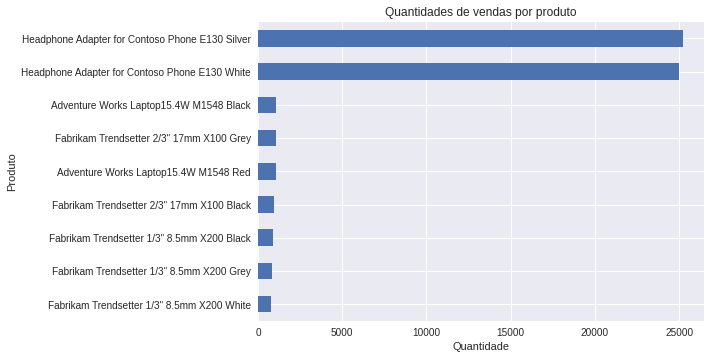

In [22]:
produtos_vendidos.plot.barh()
plt.title("Quantidades de vendas por produto")
plt.xlabel("Quantidade")
plt.ylabel("Produto")

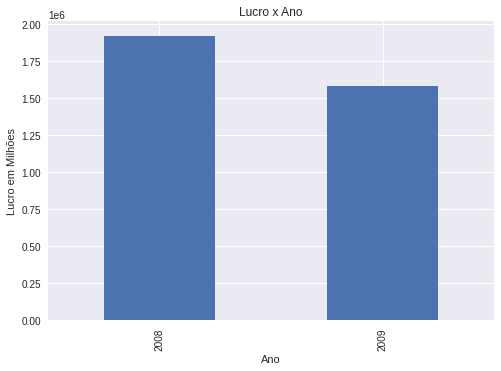

In [24]:
# 8- Qual foi o lucro por ano?

lucro = df.groupby(df["Data Venda"].dt.year)["Lucro"].sum()
lucro.plot.bar(title = "Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Lucro em Milhões")
plt.show()

In [25]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().reset_index()

,Data Venda,Lucro
0,2008,"1,920,077.71"
1,2009,"1,577,745.38"


Text(0.5, 0, 'Mês')

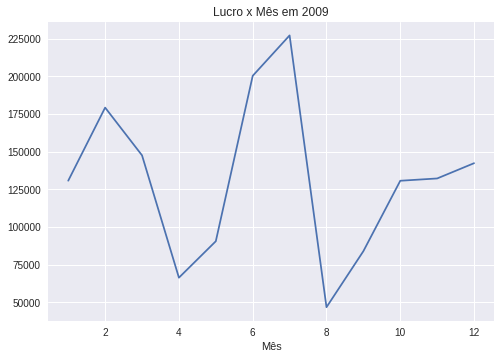

In [26]:
# 9- Qual foi o lucro por mês em 2009?

df_2009 = df[df["Data Venda"].dt.year == 2009]
lucro_2009 = df_2009.groupby([df_2009["Data Venda"].dt.month])["Lucro"].sum()

lucro_2009.plot(title = "Lucro x Mês em 2009")
plt.xlabel("Mês")

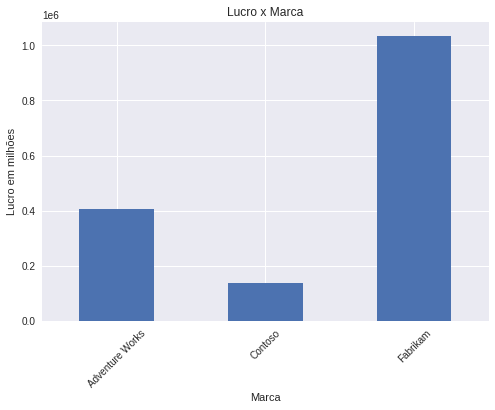

In [27]:
# 10- Qual o Lucro por marca em 2009?
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title="Lucro x Marca")
plt.ylabel("Lucro em milhões")
plt.xticks(rotation=45);


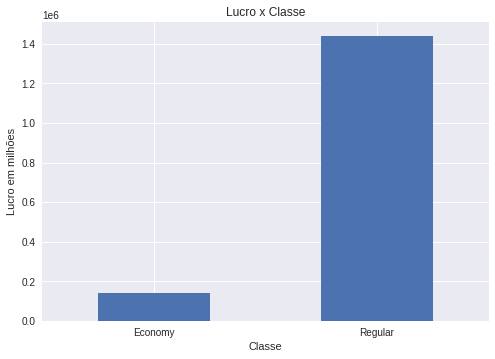

In [29]:
# 11- Qual o lucro por classe em 2009?
df_2009.groupby("Classe")["Lucro"].sum().plot.bar(title = "Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro em milhões")
plt.xticks(rotation="horizontal");

In [ ]:
# 12- 